Paweł Waszkiewicz 82677
**Zadanie 1**

In [2]:
import torch
import matplotlib.pyplot as plt

# funkcja obliczająca pole okręgu z wykorzystaniem algorytmu Monte Carlo
def monte_carlo_pi(n_samples, device):
    x = torch.rand(n_samples, 2, device=device) # losujemy punkty x, y z zakresu [0,1]
    dist = x.norm(dim=1) # obliczamy odległości punktów od środka układu współrzędnych
    inside = (dist <= 1).sum().to(torch.float32) # liczymy ilość punktów wewnątrz okręgu
    pi = (inside / n_samples) * 4 # obliczamy wartość pi
    return pi

# przykład użycia funkcji na CPU
n_samples = 100000
device = 'cpu'
pi_cpu = monte_carlo_pi(n_samples, device)
print(f'Wartość pi dla {n_samples} punktów na CPU: {pi_cpu}')

# przykład użycia funkcji na GPU
device = 'cuda'
pi_gpu = monte_carlo_pi(n_samples, device)
print(f'Wartość pi dla {n_samples} punktów na GPU: {pi_gpu}')


Wartość pi dla 100000 punktów na CPU: 3.141279935836792
Wartość pi dla 100000 punktów na GPU: 3.145599842071533


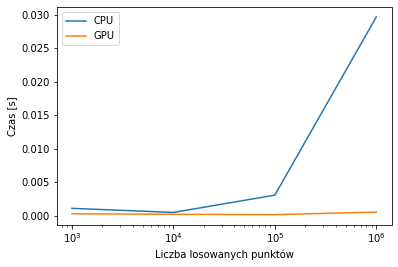

In [3]:
import time

n_samples_range = [1000, 10000, 100000, 1000000]
times_cpu = []
times_gpu = []

for n_samples in n_samples_range:
    start_time = time.time()
    monte_carlo_pi(n_samples, 'cpu')
    end_time = time.time()
    times_cpu.append(end_time - start_time)

    start_time = time.time()
    monte_carlo_pi(n_samples, 'cuda')
    end_time = time.time()
    times_gpu.append(end_time - start_time)

plt.plot(n_samples_range, times_cpu, label='CPU')
plt.plot(n_samples_range, times_gpu, label='GPU')
plt.xscale('log')
plt.xlabel("Liczba losowanych punktów")
plt.ylabel("Czas [s]")
plt.legend()
plt.show()

